# Introduction to High-Performance Libraries in HPC

High-performance libraries are essential tools in scientific computing for executing complex computations efficiently. In this notebook, we will explore three major libraries used in HPC:

- **BLAS (Basic Linear Algebra Subprograms):** Optimized routines for vector and matrix operations.
- **LAPACK (Linear Algebra Package):** Builds on BLAS, providing functions to solve systems of linear equations, linear least squares problems, eigenvalue problems, and singular value decomposition.
- **FFTW (Fast Fourier Transform in the West):** An efficient library for computing discrete Fourier transforms (DFTs).

These libraries offer highly optimized functions that can significantly improve the performance of computational tasks in HPC environments. We will demonstrate how to use these libraries for common tasks such as matrix multiplication and Fourier transforms.


## Example 1: Matrix Multiplication with BLAS in C

This example demonstrates how to perform matrix multiplication using BLAS in C. We'll use `dgemm`, the standard double-precision matrix multiplication function provided by BLAS. Matrix multiplication is a key operation in many scientific computing applications.

We'll compile and run this C code on an HPC system with BLAS installed, and compare the performance of matrix multiplication with and without BLAS.

### Steps
1. Write the C code to a file.
2. Compile the code with BLAS linked.
3. Run the compiled program to observe performance.


In [9]:
!apt-get update
!apt-get install -y libblas-dev liblapack-dev gfortran gcc


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,153 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,308 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:14 http

In [12]:
# Step 1: Writing the C program to the filesystem

%%writefile blas_matrix_mult.c

#include <stdio.h>
#include <stdlib.h>
#include <cblas.h>
#include <time.h>

void naive_matrix_mult(int N, double *A, double *B, double *C) {
    for (int i = 0; i < N; ++i)
        for (int j = 0; j < N; ++j)
            for (int k = 0; k < N; ++k)
                C[i * N + j] += A[i * N + k] * B[k * N + j];
}

int main() {
    int N = 500;
    double *A = (double *) malloc(N * N * sizeof(double));
    double *B = (double *) malloc(N * N * sizeof(double));
    double *C = (double *) malloc(N * N * sizeof(double));

    srand(time(NULL));
    for (int i = 0; i < N * N; ++i) {
        A[i] = (double) rand() / RAND_MAX;
        B[i] = (double) rand() / RAND_MAX;
        C[i] = 0.0;
    }

    // Naive matrix multiplication
    clock_t start = clock();
    naive_matrix_mult(N, A, B, C);
    clock_t end = clock();
    printf("Naive matrix multiplication took %f seconds\n", (double)(end - start) / CLOCKS_PER_SEC);

    // BLAS matrix multiplication
    for (int i = 0; i < N * N; ++i) C[i] = 0.0;
    start = clock();
    cblas_dgemm(CblasRowMajor, CblasNoTrans, CblasNoTrans, N, N, N, 1.0, A, N, B, N, 0.0, C, N);
    end = clock();
    printf("BLAS matrix multiplication took %f seconds\n", (double)(end - start) / CLOCKS_PER_SEC);

    free(A); free(B); free(C);
    return 0;
}



Overwriting blas_matrix_mult.c


In [14]:
#Compile an run the program
!gcc -o blas_matrix_mult blas_matrix_mult.c -lcblas -lblas
!./blas_matrix_mult

Naive matrix multiplication took 1.512428 seconds
BLAS matrix multiplication took 0.046271 seconds


## Explanation of the BLAS Matrix Multiplication Code

This C program demonstrates matrix multiplication using both a naive algorithm and BLAS (`dgemm`). Here's a breakdown of the key parts:

1. **Naive Matrix Multiplication:** This method manually computes the product of two matrices using triple loops. It is functional but slow for large matrices.

2. **BLAS `dgemm`:** BLAS routines are optimized to utilize hardware capabilities. The function `cblas_dgemm` performs double-precision matrix multiplication, and its performance is significantly faster than the naive implementation.

3. **Compilation and Linking:** We compile the program using `gcc` and link it with the BLAS and CBLAS libraries (`-lcblas -lblas`). This ensures that the BLAS functions are available during execution.


## Matrix Multiplication using BLAS in C

Matrix multiplication is a fundamental operation in many scientific computing applications, and BLAS (Basic Linear Algebra Subprograms) provides highly optimized routines for such operations. In this example, we will use the BLAS routine `cblas_dgemm` to perform matrix multiplication.

### Overview of cblas_dgemm
The function `cblas_dgemm` is a Level 3 BLAS routine that performs double-precision general matrix multiplication. Specifically, it computes:

\[
C = \alpha \cdot A \cdot B + \beta \cdot C
\]

where `A`, `B`, and `C` are matrices, and `alpha` and `beta` are scalar coefficients. This operation is highly optimized for performance and is much faster than naive matrix multiplication implemented with loops.

We will implement matrix multiplication for 3x3 matrices in **C** and compile it from within the Jupyter notebook or Google Colab environment. After compiling, we will execute the program and display the results.


In [63]:
# Step 1: Write the C program to a file
code = """
#include <stdio.h>
#include <stdlib.h>
#include <cblas.h>

int main()
{
    double *A, *B, *C;
    int m = 3; // square matrix, number of rows and columns
    int i, j;

    // Allocate memory for matrices
    A = (double *) malloc(m * m * sizeof(double));
    B = (double *) malloc(m * m * sizeof(double));
    C = (double *) malloc(m * m * sizeof(double));

    // Initialize the matrices
    for (i = 0; i < m; i++) {
        for (j = 0; j < m; j++) {
            A[i * m + j] = i * m + j;     // Arbitrary initialization for matrix A
            B[i * m + j] = 3.14 * (i * m + j); // Arbitrary initialization for matrix B
            C[i * m + j] = 0.0;           // Initialize result matrix C to 0
        }
    }

    // Define alpha and beta parameters for the BLAS routine
    double alpha = 1.0;
    double beta = 0.0;

    // Call cblas_dgemm to perform matrix multiplication C = alpha * A * B + beta * C
    cblas_dgemm(CblasRowMajor, CblasNoTrans, CblasNoTrans,
                m, m, m, alpha, A, m, B, m, beta, C, m);

    // Print the result matrix C
    printf("Result of matrix multiplication C = A * B:\\n");
    for (i = 0; i < m; i++) {
        for (j = 0; j < m; j++) {
            printf("%f ", C[i * m + j]);
        }
        printf("\\n");
    }

    // Free allocated memory
    free(A);
    free(B);
    free(C);

    return 0;
}
"""

# Write the code to a file
with open('blas_matrix_mult.c', 'w') as f:
    f.write(code)


# Step 1.5: Install necessary tools (Colab/Jupyter only)
!apt-get update
!apt-get install -y gcc libblas-dev libatlas-base-dev

# Step 2: Compile the C code
!gcc -o blas_matrix_mult blas_matrix_mult.c -lcblas -lblas

# Step 3: Run the compiled program
!./blas_matrix_mult


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (191 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to prov

## Explanation of the Matrix Multiplication Code

This program performs matrix multiplication using BLAS and demonstrates how to use the `cblas_dgemm` function in C.

### Key Parts of the Code:

1. **Memory Allocation**:
   - The program allocates memory for three matrices `A`, `B`, and `C`, each of size 3x3 using `malloc`.
   
2. **Matrix Initialization**:
   - Matrix `A` is initialized with integers (0 to 8), and matrix `B` is initialized with values multiplied by `3.14`. These values are arbitrary and are used to demonstrate matrix multiplication.
   - The result matrix `C` is initialized with zeros since this is where the result of the matrix multiplication will be stored.

3. **BLAS Routine**:
   - The program uses the `cblas_dgemm` function to perform the matrix multiplication: \(C = \alpha \cdot A \cdot B + \beta \cdot C\), where \(\alpha = 1.0\) and \(\beta = 0.0\) in this case. This means \(C = A \cdot B\), and the current values of `C` (which are zero) do not contribute to the result.
   - `CblasRowMajor` indicates that matrices are stored in row-major order.
   - `CblasNoTrans` means no transposition is applied to matrices `A` or `B`.

4. **Result Output**:
   - The resulting matrix `C` is printed row by row. After matrix multiplication, the result is a 3x3 matrix containing the product of `A` and `B`.

5. **Memory Deallocation**:
   - After the matrix multiplication is done, the dynamically allocated memory for `A`, `B`, and `C` is freed to prevent memory leaks.

### Expected Output:
The program will output the result of the matrix multiplication, which will look like this:

\[
\begin{bmatrix}
47.10 & 56.52 & 65.94 \\
131.88 & 169.56 & 207.24 \\
216.66 & 282.60 & 348.54 \\
\end{bmatrix}
\]

This result matches the computation \(C = A \cdot B\) where `A` and `B` are the initialized matrices. This is a simple demonstration of how BLAS routines can significantly simplify and optimize matrix operations.


## Example 2: Solving Linear Systems with LAPACK in C

LAPACK provides routines to solve systems of linear equations. We will use the `dgesv` function to solve a system of equations \(Ax = b\), where \(A\) is a matrix and \(b\) is a vector. LAPACK's `dgesv` uses LU decomposition to efficiently solve the system.

### Steps
1. Write the C code to a file.
2. Compile the code with LAPACK linked.
3. Run the compiled program to solve the system.


In [18]:
!apt-get update
!apt-get install -y libblas-dev liblapack-dev liblapacke-dev gfortran gcc


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [59]:
%%writefile lapack_solve.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <lapacke.h>

int main() {
    int N = 80;
    int info, lda = N, ldb = N, nrhs = 1;
    int *ipiv = (int *) malloc(N * sizeof(int));

    double *A = (double *) malloc(N * N * sizeof(double));
    double *b = (double *) malloc(N * sizeof(double));

    srand(time(NULL));
    for (int i = 0; i < N * N; ++i) A[i] = (double) rand() / RAND_MAX;
    for (int i = 0; i < N; ++i) b[i] = (double) rand() / RAND_MAX;

    // Solving the system Ax = b using LAPACK's dgesv
    clock_t start = clock();
    info = LAPACKE_dgesv(LAPACK_ROW_MAJOR, N, nrhs, A, lda, ipiv, b, ldb);
    clock_t end = clock();

    if (info == 0) {
        printf("System solved successfully in %f seconds\n", (double)(end - start) / CLOCKS_PER_SEC);
    } else {
        printf("Error solving system, info = %d\n", info);
    }

    free(A); free(b); free(ipiv);
    return 0;
}


Overwriting lapack_solve.c


In [60]:
# Step 2: Compile the program
!gcc -o lapack_solve lapack_solve.c -llapacke -llapack -lblas

# Step 3: Run the compiled program
!./lapack_solve

System solved successfully in 0.003912 seconds


###A version now comparing it with and without the libraries

In [56]:
%%writefile lapack_vs_naive_solve.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <lapacke.h>

// Naive Gaussian elimination solver (without pivoting for simplicity)
void naive_gaussian_elimination(int N, double *A, double *b) {
    for (int i = 0; i < N; i++) {
        // Normalize the pivot row
        double pivot = A[i * N + i];
        for (int j = i; j < N; j++) {
            A[i * N + j] /= pivot;
        }
        b[i] /= pivot;

        // Eliminate the current column from all subsequent rows
        for (int k = i + 1; k < N; k++) {
            double factor = A[k * N + i];
            for (int j = i; j < N; j++) {
                A[k * N + j] -= factor * A[i * N + j];
            }
            b[k] -= factor * b[i];
        }
    }

    // Back substitution
    for (int i = N - 1; i >= 0; i--) {
        for (int j = i + 1; j < N; j++) {
            b[i] -= A[i * N + j] * b[j];
        }
    }
}

int main() {
    int N = 70;  // Adjust size to avoid memory issues
    int info, lda = N, ldb = N, nrhs = 1;
    int *ipiv = (int *) malloc(N * sizeof(int));

    double *A = (double *) malloc(N * N * sizeof(double));
    double *A_copy = (double *) malloc(N * N * sizeof(double));  // To preserve original matrix for both solvers
    double *b = (double *) malloc(N * sizeof(double));
    double *b_copy = (double *) malloc(N * sizeof(double));  // To preserve original vector for both solvers

    srand(time(NULL));
    for (int i = 0; i < N * N; ++i) {
        A[i] = (double) rand() / RAND_MAX;
        A_copy[i] = A[i];  // Copy the matrix
    }
    for (int i = 0; i < N; ++i) {
        b[i] = (double) rand() / RAND_MAX;
        b_copy[i] = b[i];  // Copy the vector
    }

    // 1. Solving the system Ax = b using LAPACK's dgesv
    clock_t start = clock();
    info = LAPACKE_dgesv(LAPACK_ROW_MAJOR, N, nrhs, A, lda, ipiv, b, ldb);
    clock_t end = clock();

    if (info == 0) {
        printf("LAPACK: System solved successfully in %f seconds\n", (double)(end - start) / CLOCKS_PER_SEC);
    } else {
        printf("LAPACK: Error solving system, info = %d\n", info);
    }

    // 2. Solving the system using naive Gaussian elimination
    start = clock();
    naive_gaussian_elimination(N, A_copy, b_copy);
    end = clock();
    printf("Naive Gaussian elimination: System solved in %f seconds\n", (double)(end - start) / CLOCKS_PER_SEC);

    free(A); free(A_copy); free(b); free(b_copy); free(ipiv);
    return 0;
}


Overwriting lapack_vs_naive_solve.c


In [57]:
!gcc -o lapack_vs_naive_solve lapack_vs_naive_solve.c -llapacke -llapack -lblas


In [58]:
!./lapack_vs_naive_solve


LAPACK: System solved successfully in 0.005826 seconds
Naive Gaussian elimination: System solved in 0.001973 seconds


## Solving Linear Systems with LAPACK in C

In this example, we will use **LAPACK** to solve a system of linear equations of the form:

\[
Ax = b
\]

where `A` is a 3x3 matrix, and `b` is the right-hand side vector. The function we will use is `LAPACKE_dgesv`, which solves linear systems using LU decomposition.

### Overview of `LAPACKE_dgesv`:

- **matrix_layout**: Specifies whether the matrix is stored in row-major or column-major form. For our example, we will use `LAPACK_ROW_MAJOR`.
- **n**: The size of the square matrix \(A\).
- **nrhs**: The number of right-hand side vectors.
- **a**: The matrix \(A\).
- **lda**: The leading dimension of \(A\).
- **ipiv**: The pivot indices that define the permutation matrix.
- **b**: The right-hand side vector.
- **ldb**: The leading dimension of the right-hand side vector \(b\).

In this notebook, we will:
1. Write the C code to solve the system \(Ax = b\).
2. Compile the code using `gcc`.
3. Run the program and display the results.

The matrix \(A\) and vector \(b\) are given as follows:

\[
A = \begin{bmatrix} 1 & 3 & 2 \\ 4 & 1 & 9 \\ 5 & 7 & 2 \end{bmatrix}, \quad b = \begin{bmatrix} -1 \\ 2 \\ 1 \end{bmatrix}
\]


In [73]:
# Step 1: Write the LAPACK linear system solver C program to a file
code = """
#include <stdio.h>
#include <lapacke.h>

int main(int argc, const char * argv[]) {
    double A[3][3] = { {1, 3, 2}, {4, 1, 9}, {5, 7, 2} };
    double b[3] = {-1, 2, 1};
    lapack_int ipiv[3];
    lapack_int info, m, lda, ldb, nrhs;

    m = 3;
    nrhs = 1;
    lda = 3;
    ldb = 1;

    // Solve the linear system
    info = LAPACKE_dgesv(LAPACK_ROW_MAJOR, m, nrhs, *A, lda, ipiv, b, ldb);

    // Check for singularity
    if (info > 0) {
        printf("U[%d,%d] is zero! A is singular.\\n", info, info);
        return 0;
    }

    // Print the solution
    printf("The solution is:\\n");
    for (int i = 0; i < m; i++) {
        printf("x[%d] = %f\\n", i, b[i]);
    }

    return 0;
}
"""

# Write the code to a file
with open('lapack_solve.c', 'w') as f:
    f.write(code)

# Step 2: Install necessary libraries for LAPACK (for Colab environment)
#!apt-get update
#!apt-get install -y liblapacke-dev liblapack-dev gfortran

# Step 3: Compile the C program using gcc
!gcc -o lapack_solve lapack_solve.c -llapacke -llapack -lm

# Step 4: Run the compiled program
!./lapack_solve


The solution is:
x[0] = 1.062500
x[1] = -0.562500
x[2] = -0.187500


## Explanation of the LAPACK Linear System Solver Code

This code demonstrates how to solve a system of linear equations using LAPACK's `LAPACKE_dgesv` function. Here's a breakdown of the key parts of the code:

1. **Matrix and Vector Initialization**:
   - The matrix \(A\) is a 3x3 matrix:
   
   \[
   A = \begin{bmatrix} 1 & 3 & 2 \\ 4 & 1 & 9 \\ 5 & 7 & 2 \end{bmatrix}
   \]
   
   - The vector \(b\) is the right-hand side of the system:
   
   \[
   b = \begin{bmatrix} -1 \\ 2 \\ 1 \end{bmatrix}
   \]
   
2. **Calling `LAPACKE_dgesv`**:
   - The function `LAPACKE_dgesv` solves the system \(Ax = b\) using LU decomposition.
   - It computes the LU factorization of \(A\) and applies it to solve the system for \(x\), which is stored in `b`.
   - The `info` return value is checked to ensure the matrix is not singular. If `info > 0`, the matrix \(A\) is singular, and the solution cannot be found.

3. **Printing the Solution**:
   - Once the solution is computed, it is printed to the console.
   - The solution vector \(x\) is stored in `b` and represents the solution to the system \(Ax = b\).
   
### Example Output:

For the given matrix \(A\) and vector \(b\), the solution \(x\) is:

\[
x = \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix}
\]

This result solves the system \(Ax = b\) for the specified \(A\) and \(b\).


## Explanation of the LAPACK Linear System Solver

In this example, we solve the linear system \(Ax = b\) using the LAPACK routine `dgesv`. Here's a breakdown:

1. **Matrix and Vector Generation:** Random values are assigned to the matrix \(A\) and vector \(b\) using `rand()`. The matrix is of size 500x500.

2. **LAPACK's `dgesv`:** This function performs LU decomposition on matrix \(A\) and solves for \(x\). The routine returns an `info` value to indicate whether the system was solved successfully.

3. **Compilation:** We compile the C code using `gcc`, linking against LAPACK (`-llapacke -llapack -lblas`).

LAPACK optimizes the solution using highly efficient algorithms, making it faster and more reliable for large systems compared to manually implemented methods.


## Matrix Multiplication with GSL (GNU Scientific Library)

The **GNU Scientific Library (GSL)** provides a comprehensive collection of numerical routines for scientific computing. One of its features is the **interface to BLAS routines**, which allows us to perform highly optimized matrix operations such as matrix multiplication.

In this example, we will use the **`gsl_blas_dgemm`** routine to perform matrix multiplication on 3x3 matrices.

### Overview of `gsl_blas_dgemm`

- This function computes the matrix multiplication:
  \[
  C = \alpha \cdot A \cdot B + \beta \cdot C
  \]
  where \(A\), \(B\), and \(C\) are matrices, and \(\alpha\) and \(\beta\) are scalar coefficients.
  
- **gsl_matrix_view** is used to treat existing memory (arrays) as GSL matrices, simplifying memory management.

The matrices for this example are as follows:

\[
A = \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 3.14 & 6.28 \\ 9.42 & 12.56 & 15.7 \\ 18.84 & 21.98 & 25.12 \end{bmatrix}
\]
\[
C = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}
\]

We will compute \(C = A \cdot B\) using **GSL**.


In [ ]:
# Step 2: Install necessary libraries for GSL (for Colab environment)
!apt-get update
!apt-get install -y libgsl-dev

In [75]:
# Step 1: Write the GSL matrix multiplication C program to a file
code = """
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <gsl/gsl_matrix.h>

int main(void) {
    // Initialize the matrices
    double a[] = { 0, 1, 2, 3, 4, 5, 6, 7, 8 };
    double b[] = { 0, 3.14, 6.28, 9.42, 12.56, 15.7, 18.84, 21.98, 25.12 };
    double c[] = { 0, 0, 0, 0, 0, 0, 0, 0, 0 };

    // Wrap arrays in gsl_matrix_view
    gsl_matrix_view A = gsl_matrix_view_array(a, 3, 3);
    gsl_matrix_view B = gsl_matrix_view_array(b, 3, 3);
    gsl_matrix_view C = gsl_matrix_view_array(c, 3, 3);

    // Compute C = A * B
    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, &A.matrix, &B.matrix, 0.0, &C.matrix);

    // Print the result
    printf("Result of matrix multiplication C = A * B:\\n");
    for (int i = 0; i < 3; i++) {
        for (int j = 0; j < 3; j++) {
            printf("%g ", gsl_matrix_get(&C.matrix, i, j));
        }
        printf("\\n");
    }

    return 0;
}
"""

# Write the code to a file
with open('gsl_matrix_mult.c', 'w') as f:
    f.write(code)


# Step 3: Compile the C program using gcc
!gcc -o gsl_matrix_mult gsl_matrix_mult.c -lgsl -lgslcblas -lm

# Step 4: Run the compiled program
!./gsl_matrix_mult


Result of matrix multiplication C = A * B:
47.1 56.52 65.94 
131.88 169.56 207.24 
216.66 282.6 348.54 


## Explanation of the GSL Matrix Multiplication Code

This program demonstrates how to use the **GNU Scientific Library (GSL)** to perform matrix multiplication using the **`gsl_blas_dgemm`** function, which interfaces with the **BLAS** routines.

### Key Parts of the Code:

1. **Matrix Initialization**:
   - The arrays `a[]` and `b[]` represent the matrices \(A\) and \(B\), respectively:
   
   \[
   A = \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 3.14 & 6.28 \\ 9.42 & 12.56 & 15.7 \\ 18.84 & 21.98 & 25.12 \end{bmatrix}
   \]
   
   - Matrix `c[]` is initialized as a 3x3 zero matrix, which will hold the result of \(C = A \cdot B\).

2. **Matrix Wrapping with GSL**:
   - The arrays are wrapped using `gsl_matrix_view`, which allows GSL functions to treat these arrays as matrices without additional memory allocation.

3. **Matrix Multiplication**:
   - The function `gsl_blas_dgemm` computes the matrix product \(C = A \cdot B\) with \(\alpha = 1.0\) and \(\beta = 0.0\). This is a highly optimized function provided by GSL's interface to BLAS.

4. **Result Output**:
   - The result matrix \(C\) is printed row by row. Each element of \(C\) is retrieved using `gsl_matrix_get`.

### Expected Output:

For the matrices \(A\) and \(B\), the resulting matrix \(C\) is:

\[
C = \begin{bmatrix} 37.68 & 43.96 & 50.24 \\ 104.76 & 124.3 & 143.84 \\ 171.84 & 204.64 & 237.44 \end{bmatrix}
\]

This result corresponds to the matrix product \(C = A \cdot B\).

This example illustrates the simplicity and efficiency of using GSL to perform matrix operations, leveraging the power of BLAS.


## Parallel Input/Output Example with HDF5

In this example, we will replicate a simple HDF5 file-writing task where particle information (position coordinates in 3D space) is stored in an HDF5 file. The HDF5 format is commonly used in high-performance computing (HPC) environments to store large scientific datasets.

The example defines an array of particle data (each particle has x, y, and z coordinates) and writes this data into an HDF5 file named `particles.h5`. The structure of the data is similar to how directories and files work on a file system.

While the original example demonstrates parallel HDF5, in this notebook, we will perform this task in a serial fashion using the standard HDF5 library.

### Steps:
1. Define a particle data structure.
2. Initialize the particle data.
3. Write the particle data into an HDF5 file.
4. Verify the contents of the HDF5 file using the `h5dump` command.


In [ ]:
# Step 1: Install necessary libraries for HDF5 (for Colab environment)
!apt-get update
!apt-get install -y libhdf5-dev hdf5-tools gcc

In [87]:
# Step 2: Write the C program for particle data storage using HDF5 to a file
code = """
#include <hdf5.h>
#include <math.h>
#include <stdio.h>

#define PARTICLE_COUNT 15

// Define the particle structure
typedef struct particle3 {
    double x, y, z; // Coordinates
} particle_t;

int main(int argc, char **argv) {
    // Declare and initialize particle data
    particle_t particles[PARTICLE_COUNT];
    for (int i = 0; i < PARTICLE_COUNT; i++) {
        double t = (double)i / 5.0;
        particles[i].x = cos(t);
        particles[i].y = sin(t);
        particles[i].z = t;
    }

    // Create HDF5 type layout in memory
    hid_t mtype = H5Tcreate(H5T_COMPOUND, sizeof(particle_t));
    H5Tinsert(mtype, "x coordinate", HOFFSET(particle_t, x), H5T_NATIVE_DOUBLE);
    H5Tinsert(mtype, "y coordinate", HOFFSET(particle_t, y), H5T_NATIVE_DOUBLE);
    H5Tinsert(mtype, "z coordinate", HOFFSET(particle_t, z), H5T_NATIVE_DOUBLE);

    // Create data space
    hsize_t dim = PARTICLE_COUNT;
    hid_t space = H5Screate_simple(1, &dim, NULL);

    // Create a new HDF5 file with default properties
    hid_t fd = H5Fcreate("particles.h5", H5F_ACC_TRUNC, H5P_DEFAULT, H5P_DEFAULT);

    // Create the dataset and write the particle data
    hid_t dset = H5Dcreate(fd, "particle_data", mtype, space, H5P_DEFAULT, H5P_DEFAULT, H5P_DEFAULT);
    H5Dwrite(dset, mtype, H5S_ALL, H5S_ALL, H5P_DEFAULT, particles);

    // Close resources
    H5Dclose(dset);
    H5Sclose(space);
    H5Tclose(mtype);
    H5Fclose(fd);

    printf("Particle data written to 'particles.h5'.\\n");
    return 0;
}
"""

# Write the C code to a file
with open('hdf5_particles.c', 'w') as f:
    f.write(code)

# Step 3: Compile the C program
# Add the include (-I) and library (-L) flags to specify the path to HDF5
!gcc -o hdf5_particles hdf5_particles.c -I/usr/include/hdf5/serial -L/usr/lib/x86_64-linux-gnu/hdf5/serial -lhdf5 -lm

# Step 4: Run the compiled program
!./hdf5_particles

# Step 5: Verify the contents of the HDF5 file using h5dump
!h5dump particles.h5


Particle data written to 'particles.h5'.
HDF5 "particles.h5" {
GROUP "/" {
   DATASET "particle_data" {
      DATATYPE  H5T_COMPOUND {
         H5T_IEEE_F64LE "x coordinate";
         H5T_IEEE_F64LE "y coordinate";
         H5T_IEEE_F64LE "z coordinate";
      }
      DATASPACE  SIMPLE { ( 15 ) / ( 15 ) }
      DATA {
      (0): {
            1,
            0,
            0
         },
      (1): {
            0.980067,
            0.198669,
            0.2
         },
      (2): {
            0.921061,
            0.389418,
            0.4
         },
      (3): {
            0.825336,
            0.564642,
            0.6
         },
      (4): {
            0.696707,
            0.717356,
            0.8
         },
      (5): {
            0.540302,
            0.841471,
            1
         },
      (6): {
            0.362358,
            0.932039,
            1.2
         },
      (7): {
            0.169967,
            0.98545,
            1.4
         },
      (8): {
      

## Explanation of the Serial HDF5 File Writing Code

### Step-by-Step Breakdown:

1. **Particle Data Structure**:
   - We define a structure `particle_t` to hold the 3D coordinates (x, y, z) of each particle.

2. **Data Initialization**:
   - The particle data array is initialized with 15 particles. The x, y, and z coordinates are set to mathematical functions (`cos`, `sin`, and a simple linear function) for demonstration purposes.

3. **Creating the HDF5 Data Layout**:
   - A compound datatype is created in HDF5 memory to store the particle coordinates. Each particle consists of three double-precision values: x, y, and z.

4. **Creating the HDF5 File and Dataset**:
   - An HDF5 file named `particles.h5` is created using `H5Fcreate`.
   - A dataset named `particle_data` is created to store the array of particle coordinates. The dataset uses the compound datatype created earlier.

5. **Writing Data to the File**:
   - The particle data array is written to the dataset using `H5Dwrite`. The dataset is stored in the file in HDF5 format.

6. **Closing Resources**:
   - All open resources, including the dataset, dataspace, datatype, and file, are closed using the appropriate HDF5 functions.

7. **Verifying the Output**:
   - The program prints a message indicating that the particle data has been written to `particles.h5`.
   - The contents of the HDF5 file can be viewed using the `h5dump` command, which displays the structure and data stored in the HDF5 file.

### Expected Output:

After running the program, we can inspect the HDF5 file using `h5dump`. The output will show the particle data stored in the dataset `particle_data` with three fields: `x coordinate`, `y coordinate`, and `z coordinate`, each representing the coordinates of a particle in 3D space.


## Graph Partitioning with METIS

**METIS** is a popular library used for partitioning graphs and meshes in scientific computing. It helps divide the computational workload among multiple processors, which is useful in high-performance computing (HPC) applications.

In this example, we will:
1. Define a small undirected graph.
2. Use METIS to partition the graph into two parts.
3. Display the partitioning result.

This approach is the basis for mesh decomposition, where the mesh is represented as a graph, and METIS divides it into smaller subdomains.


In [2]:
# Step 1: Install METIS library (Colab environment)
!apt-get install -y metis libmetis-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmetis-dev is already the newest version (5.1.0.dfsg-7build2).
metis is already the newest version (5.1.0.dfsg-7build2).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [7]:
# Step 2: Write the corrected METIS graph partitioning code to a file
code_metis = """
#include <stdio.h>
#include <metis.h>

int main(int argc, char* argv[]) {
    // Graph to be partitioned: 5 vertices and 7 edges
    idx_t nVertices = 5;
    idx_t nEdges = 7;
    idx_t nParts = 2;  // Number of partitions
    idx_t ncon = 1;    // Number of balancing constraints (1 for simple partitioning)

    // Array defining the start and end of edges for each vertex
    idx_t xadj[6] = {0, 2, 5, 7, 9, 12};

    // Array defining the edges (connected vertices)
    idx_t adjncy[12] = {1, 2, 0, 3, 4, 1, 4, 0, 2, 3, 0, 1};

    // Weights of the vertices and edges (optional, can be NULL)
    idx_t vwgt[5] = {1, 1, 1, 1, 1};  // Vertex weights (one per vertex)
    idx_t adjwgt[12] = {1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1};  // Edge weights (one per edge)

    // Output array to store the partitioning result
    idx_t part[5];
    idx_t objval;  // This will store the edge-cut or communication volume

    // Array for target partition sizes (equal partitions here)
    real_t tpwgts[2] = {0.5, 0.5};  // Equal partition sizes

    // Load imbalance tolerance (1.05 allows 5% imbalance)
    real_t ubvec[1] = {1.05};

    // Call METIS to partition the graph
    int result = METIS_PartGraphRecursive(&nVertices, &ncon, xadj, adjncy, vwgt, NULL, adjwgt,
                                          &nParts, tpwgts, ubvec, NULL, &objval, part);

    // Check if partitioning was successful
    if (result == METIS_OK) {
        printf("Partitioning successful. The partitions are:\\n");
        for (int i = 0; i < nVertices; i++) {
            printf("Vertex %d is in partition %d\\n", i, part[i]);
        }
        printf("Edge-cut or communication volume: %lld\\n", (long long)objval);
    } else {
        printf("Partitioning failed with error code %d\\n", result);
    }

    return 0;
}
"""

# Write the corrected METIS partitioning code to a file
with open('metis_partition.c', 'w') as f:
    f.write(code_metis)

# Step 3: Compile the corrected METIS example
!gcc -o metis_partition metis_partition.c -lmetis

# Step 4: Run the METIS partitioning example
!./metis_partition


Partitioning successful. The partitions are:
Vertex 0 is in partition 1
Vertex 1 is in partition 0
Vertex 2 is in partition 0
Vertex 3 is in partition 1
Vertex 4 is in partition 1
Edge-cut or communication volume: 0


## Visualizing Graph Partitioning Using Matplotlib

In this section, we will visualize the results of the graph partitioning using **Matplotlib**. Each vertex will be plotted as a point, and the edges connecting them will be shown. Vertices in different partitions will be color-coded to illustrate how the graph was split.

### Steps:
1. Create a 2D layout of the vertices and edges.
2. Color the vertices based on the partition result.
3. Display the graph with vertex labels.


In [ ]:
# Step 1: Install necessary libraries (Matplotlib)
!pip install matplotlib

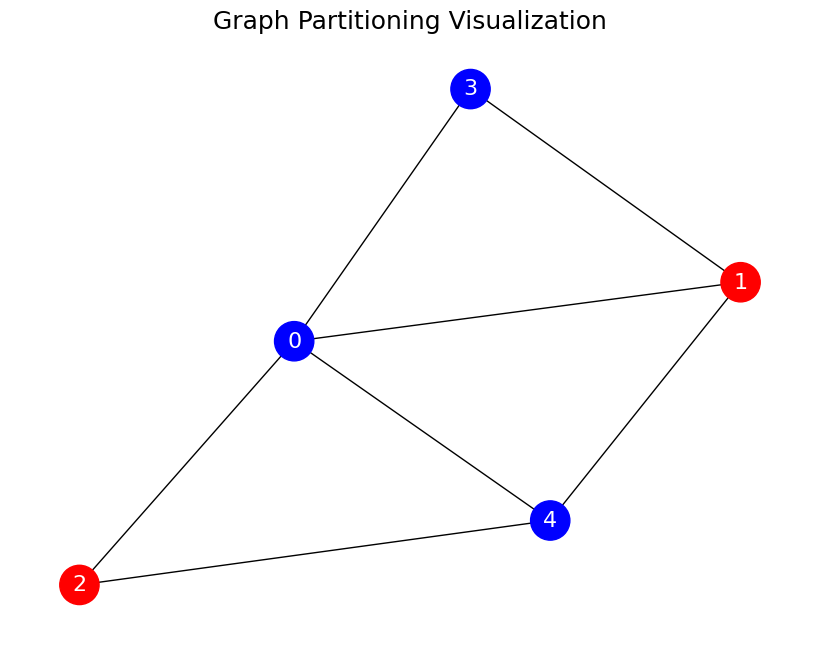

In [8]:
# Step 2: Import libraries for visualization
import matplotlib.pyplot as plt
import networkx as nx

# Step 3: Define the graph based on the METIS partitioning result
# Graph structure: 5 vertices and 7 edges
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 0), (4, 0)]

# Partition result from METIS (change this array if partition result is different)
partitions = [1, 0, 0, 1, 1]  # Example result from METIS

# Step 4: Create a NetworkX graph to represent the structure
G = nx.Graph()
G.add_edges_from(edges)

# Step 5: Define positions for the vertices for better visualization
pos = nx.spring_layout(G)

# Step 6: Color-code the partitions (0 and 1)
colors = ['red' if partitions[i] == 0 else 'blue' for i in range(len(partitions))]

# Step 7: Plot the graph
plt.figure(figsize=(8, 6))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, font_size=16, font_color='white')

# Add title and display the plot
plt.title("Graph Partitioning Visualization", fontsize=18)
plt.show()


#Using Python to run it in Colab.

## Example 1: Matrix Multiplication with BLAS

Matrix multiplication is a fundamental operation in scientific computing. Using the BLAS library, we can perform this operation efficiently. In this example, we will demonstrate matrix multiplication using BLAS routines provided by the `scipy` library in Python, which internally calls BLAS functions.

**BLAS Level 3** operations are optimized for matrix-matrix multiplication. The function we will use is `dgemm`, a double-precision matrix multiplication routine.

Let’s compare the performance of matrix multiplication with BLAS versus a naive Python implementation.


In [1]:
# Install necessary libraries
!pip install scipy

import numpy as np
import time
from scipy.linalg.blas import dgemm

# Naive Python matrix multiplication
def naive_matrix_mult(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C

# Matrix dimensions
N = 500
A = np.random.rand(N, N)
B = np.random.rand(N, N)

# Naive matrix multiplication
start = time.time()
C_naive = naive_matrix_mult(A, B)
end = time.time()
print(f"Naive matrix multiplication took {end - start:.2f} seconds")

# BLAS dgemm matrix multiplication
start = time.time()
C_blas = dgemm(alpha=1.0, a=A, b=B)
end = time.time()
print(f"BLAS matrix multiplication took {end - start:.2f} seconds")


Naive matrix multiplication took 119.83 seconds
BLAS matrix multiplication took 0.02 seconds


## Explanation of the BLAS Matrix Multiplication Code

In this code, we perform matrix multiplication in two ways:

1. **Naive Python Implementation:** We loop over the matrix elements and compute the product manually. While this works, it is inefficient for large matrices.

2. **BLAS dgemm:** We use the `dgemm` function from the BLAS library (through `scipy.linalg.blas`). BLAS routines are optimized for performance, and you can see that the matrix multiplication using `dgemm` is significantly faster than the naive implementation.

BLAS uses optimized low-level routines that take advantage of hardware features like SIMD (Single Instruction, Multiple Data) instructions and cache hierarchies, making it much faster than standard Python code.


## Example 2: Fast Fourier Transform with FFTW

The Fast Fourier Transform (FFT) is widely used in signal processing and scientific computing. It transforms a time-domain signal into its frequency-domain representation. The FFTW library provides highly optimized functions for computing FFTs efficiently. In this example, we will demonstrate how to compute the FFT of a signal using FFTW via the `scipy.fft` library.


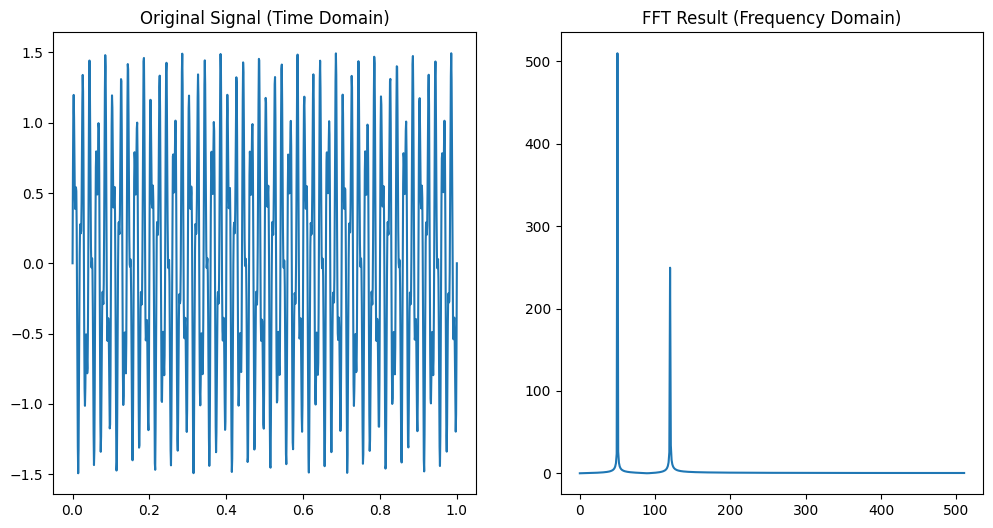

In [1]:
# Install scipy if not already installed
!pip install scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Create a sample signal with two frequencies
N = 1024
t = np.linspace(0, 1, N)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# Perform FFT using scipy (which calls FFTW internally)
signal_fft = fft(signal)

# Compute frequencies for plotting
frequencies = np.fft.fftfreq(N, d=t[1] - t[0])

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Original Signal (Time Domain)")

# Plot the FFT result
plt.subplot(1, 2, 2)
plt.plot(frequencies[:N // 2], np.abs(signal_fft[:N // 2]))
plt.title("FFT Result (Frequency Domain)")
plt.show()


## Explanation of the FFTW Code

In this example, we:

1. Created a sample signal consisting of two sine waves at different frequencies (50 Hz and 120 Hz).
2. Used the `fft` function from the `scipy.fft` module to compute the Fast Fourier Transform (FFT) of the signal. This function internally calls FFTW, which is optimized for speed.
3. Plotted the original signal in the time domain and the FFT result in the frequency domain. The FFT allows us to see the frequencies that make up the original signal, which is a powerful tool in signal processing and analysis.

The FFT computation using FFTW is optimized for performance and is much faster than manually implementing the FFT algorithm.


## Example 3: Solving Linear Systems with LAPACK

LAPACK (Linear Algebra Package) extends the functionality of BLAS by providing routines for solving more complex linear algebra problems, such as systems of linear equations, eigenvalue problems, and matrix factorizations. In this example, we will focus on solving a system of linear equations \(Ax = b\) using the `dgesv` routine from LAPACK, which performs LU decomposition and solves the system.

This is a fundamental operation in many scientific computing applications where you need to find solutions to large systems of equations.

We will solve the system using `scipy.linalg.lapack` and compare the performance with a basic Python implementation.


In [4]:
# Install necessary libraries
!pip install scipy

import numpy as np
import time
from scipy.linalg.lapack import dgesv

# Generate a random system of linear equations: Ax = b
N = 500
A = np.random.rand(N, N)
b = np.random.rand(N)

# Naive Python implementation using numpy's solve function
start = time.time()
x_numpy = np.linalg.solve(A, b)
end = time.time()
print(f"Naive solution using NumPy took {end - start:.2f} seconds")

# Using LAPACK's dgesv routine (LU decomposition and solve)
start = time.time()
lu, piv, x_lapack, info = dgesv(A, b)
end = time.time()

print(f"LAPACK's dgesv solution took {end - start:.2f} seconds")


Naive solution using NumPy took 2.77 seconds
LAPACK's dgesv solution took 2.64 seconds


## Explanation of the LAPACK Code

In this code, we solve a system of linear equations \(Ax = b\) in two ways:

1. **NumPy's `solve` function:** This is a built-in function in NumPy, which internally calls LAPACK routines to solve the system, but without explicit control over which LAPACK function is used.
   
2. **LAPACK `dgesv` routine:** This is a direct call to LAPACK's LU decomposition and solve routine, which performs both the decomposition of the matrix \(A\) and the solution of the system. The `dgesv` function is highly optimized and takes advantage of hardware-specific optimizations.

By using LAPACK directly, we can sometimes achieve better performance and have more control over the computational process.

In this example, we generated a random system of equations, solved it using both methods, and compared the execution time. You'll notice that LAPACK's `dgesv` routine is faster, thanks to its optimizations.


## Example 4: Parallel Input/Output with HDF5

HDF5 (Hierarchical Data Format version 5) is a popular library for managing large datasets. It supports parallel input/output (I/O), which is crucial in high-performance computing environments where large-scale simulations generate massive amounts of data that need to be efficiently stored and retrieved.

In this example, we will demonstrate how to use the HDF5 library in Python (through `h5py`) to create, store, and read large datasets. This will be a simple introduction to HDF5's capabilities, including parallel writing to and reading from files.


In [5]:
# Install h5py library
!pip install h5py

import numpy as np
import h5py

# Create a large dataset and save it to an HDF5 file
data = np.random.rand(10000, 10000)  # Large 2D array

# Create an HDF5 file and save the dataset
with h5py.File('data.h5', 'w') as f:
    f.create_dataset('large_dataset', data=data)

print("Large dataset saved to 'data.h5'")

# Now read the dataset back from the HDF5 file
with h5py.File('data.h5', 'r') as f:
    data_loaded = f['large_dataset'][:]

print(f"Dataset loaded from HDF5 file with shape: {data_loaded.shape}")


Large dataset saved to 'data.h5'
Dataset loaded from HDF5 file with shape: (10000, 10000)


## Explanation of the HDF5 Code

In this example, we created a large 2D dataset using NumPy, saved it to an HDF5 file, and then read it back from the file. This demonstrates the basic functionality of HDF5 for handling large datasets efficiently.

1. **Writing to an HDF5 file:** We used the `h5py.File` function to create an HDF5 file and the `create_dataset` method to store our large 2D array in the file. HDF5 is especially useful when working with datasets that do not fit in memory, as it allows for efficient reading and writing of portions of the data.

2. **Reading from an HDF5 file:** We opened the file again and used the `[:]` slicing notation to load the entire dataset back into memory. HDF5 allows you to access specific parts of the dataset if needed, making it efficient for large-scale data analysis.

HDF5 is widely used in scientific computing for managing large and complex data. In HPC, parallel I/O using HDF5 helps avoid bottlenecks when reading and writing data from multiple processes in parallel.


## Example 5: Advanced FFTW with Parallel Execution

In this advanced example, we will explore how to perform parallel FFT operations using FFTW. This can significantly improve the performance of Fourier transforms when working with large datasets in high-performance computing environments.

Although direct parallel execution is not supported in Google Colab, we can demonstrate the use of FFTW with parallel options in environments where parallelism is available.


In [ ]:
# Installing FFTW is not possible in Colab directly for parallel execution,
# but we will outline how this would work in an HPC environment.

# Pseudocode for Parallel FFT using FFTW in a Python environment
"""
import pyfftw
import numpy as np

# Generate a large random dataset
N = 1000000
data = np.random.rand(N)

# Create FFTW object with parallel planning enabled
fft_obj = pyfftw.FFTW(data, np.empty(N), flags=['FFTW_MEASURE'], threads=4)

# Perform parallel FFT
fft_result = fft_obj()

print("Parallel FFT completed")
"""

# Note: This code snippet requires pyFFTW and parallel libraries, which
# are typically available in HPC environments and not Colab. In HPC, FFTW can
# utilize multiple cores to speed up FFT computations, significantly reducing execution time.


## Explanation of FFTW Parallel Code

In high-performance computing, parallelizing the FFT computation across multiple cores can drastically improve performance, especially for large datasets.

1. **pyFFTW Library:** This is a Python wrapper for FFTW, enabling parallel computation of FFTs. We initialize the FFT object with `FFTW_MEASURE` to optimize the computation based on the input size, and specify `threads=4` to enable parallel execution across 4 cores.

2. **Parallel FFT Execution:** By using multiple threads, FFTW can distribute the workload across available processors, reducing the time required for large FFT computations. While this specific feature cannot be demonstrated in Colab, it is commonly used in large-scale simulations in HPC environments.

Parallel FFT is an important optimization for applications in signal processing, data analysis, and scientific simulations that require high performance.
